<a href="https://colab.research.google.com/github/karenbennis/Xy/blob/analysis_visuals/yelp_reviews_visuals_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Connect to Database**

In [1]:
# Install Java, Spark, and Findspark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://www-us.apache.org/dist/spark/spark-2.4.6/spark-2.4.6-bin-hadoop2.7.tgz
!tar xf spark-2.4.6-bin-hadoop2.7.tgz
!pip install -q findspark

# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.6-bin-hadoop2.7"

# Start a SparkSession
import findspark
findspark.init()

#Interact with SQL
!wget https://jdbc.postgresql.org/download/postgresql-42.2.9.jar

# Start Spark Session(Creating spark application with name defined by appName()) ---IMPORTED WITH EVERY COLAB NOTEBOOK
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("database_transformation").config("spark.driver.extraClassPath","/content/postgresql-42.2.9.jar").getOrCreate()

--2020-07-20 20:34:21--  https://jdbc.postgresql.org/download/postgresql-42.2.9.jar
Resolving jdbc.postgresql.org (jdbc.postgresql.org)... 72.32.157.228, 2001:4800:3e1:1::228
Connecting to jdbc.postgresql.org (jdbc.postgresql.org)|72.32.157.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 914037 (893K) [application/java-archive]
Saving to: ‘postgresql-42.2.9.jar.1’

postgresql-42.2.9.j 100%[===================>] 892.61K  1.03MB/s    in 0.8s    

2020-07-20 20:34:23 (1.03 MB/s) - ‘postgresql-42.2.9.jar.1’ saved [914037/914037]



In [2]:
# Authenticate user
from google.colab import auth
auth.authenticate_user()

In [3]:
# Set project id
project_id = 'xy-yelp'

In [4]:
# Set project
!gcloud config set project {project_id}

Updated property [core/project].


In [5]:
# Get file which was saved to bucket **** file saves as multiple files so this should be addressed in the future, for now the 11mb file should be fine
!gsutil cp -r gs://xy-bucket/json_files/ml_j.json/part-00000-f8a8f21c-0ebe-434c-a8b3-a5c8988dd298-c000.json /tmp/machine_json.json

Copying gs://xy-bucket/json_files/ml_j.json/part-00000-f8a8f21c-0ebe-434c-a8b3-a5c8988dd298-c000.json...
| [1 files][ 62.5 MiB/ 62.5 MiB]                                                
Operation completed over 1 objects/62.5 MiB.                                     


In [6]:
# Set filepath to tmp folder where bucket file was saved **** this could actually be done without saving to the bucket, this is just done to make sure we can 
# save to and read from bucket if we need to
filepath = '/tmp/machine_json.json'

In [7]:
# Import pandas and read json file into DataFrame
import pandas as pd
raw_json = pd.read_json(filepath, lines=True)

In [8]:
#Drop useless columns
raw_json=raw_json[['review_id','stars','class','review_text','length','cool','useful','funny','business_id','user_id']]

In [9]:
# Show dataframe
raw_json.head()

,review_id,stars,class,review_text,length,cool,useful,funny,business_id,user_id
0,-7yxrdY13ay15rGB7WibMA,5,1,I have been going to Arizona Auto Care since a...,670,0,0,0,Lh9nz0KYyzE-YRbKuCYeUw,ayKW9eWwGFcrtJaHcwZUCw
1,-Be0UUGYuiDJVAM_YqeQuA,4,1,"Since Im big into breakfast foods, Im always o...",1348,0,2,2,pa6K7DGByxBXxcVJ59nWMw,_4lqpCYCqOQzbB6xQGGhrQ
2,-nQHHXi-d_yuW301_Y0EZQ,2,0,"A pleasant place in Kierland Center, but has g...",813,0,0,0,GIGI8bJfN6HyPzmEW-QqjA,4QORbyhfN01oKR_GgBstfQ
3,2L30O7G8IQ6HILpR0t5RFA,5,1,"part of a social event, we only had app's here...",415,0,0,0,qiwajZigq_2twTmYofPmDQ,ST8Yzlk2MqKlcaLqL2djBg
4,4x5yLG7_yGLuN-w6fV0eBw,4,1,I love every place on South Mountain. I've bee...,302,0,1,0,9yKzy9PApeiPPOUJEtnvkg,Vk-hJ1i5ZagPM87Kv9FOnA


In [13]:
raw_json.dtypes

review_id      object
stars           int64
class           int64
review_text    object
length          int64
cool            int64
useful          int64
funny           int64
business_id    object
user_id        object
dtype: object

In [14]:
raw_json['stars']=raw_json['stars'].astype(str)
raw_json.dtypes

review_id      object
stars          object
class           int64
review_text    object
length          int64
cool            int64
useful          int64
funny           int64
business_id    object
user_id        object
dtype: object

**Visualizations**

(array([3337.,    0., 3526.,    0.,    0.,  927.,    0., 1461.,    0.,
         749.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

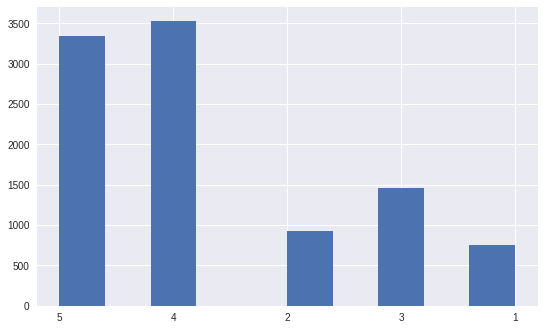

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
plt.hist(raw_json['stars'])